In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC_5.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 15; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



c:\Users\Utilisateur\anaconda3\envs\mpc\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Simulating time 0.00: 

c:\Users\Utilisateur\anaconda3\envs\mpc\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


dhat =  [24.47481134]
Fuel left: 1.00 kg, 
Simulating time 0.05: dhat =  [24.47481134]
Fuel left: 1.00 kg, 
Simulating time 0.10: dhat =  [24.47481134]
Fuel left: 0.99 kg, 
Simulating time 0.15: dhat =  [24.47481134]
Fuel left: 0.99 kg, 
Simulating time 0.20: dhat =  [24.47481134]
Fuel left: 0.99 kg, 
Simulating time 0.25: dhat =  [24.47481134]

 State alpha violation: 0.18 > 0.17, Fuel left: 0.99 kg, 
Simulating time 0.30: dhat =  [24.47481134]

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.19 > 0.17, Fuel left: 0.99 kg, 
Simulating time 0.35: dhat =  [24.47481134]

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, Fuel left: 0.98 kg, 
Simulating time 0.40: dhat =  [24.47481134]
Fuel left: 0.98 kg, 
Simulating time 0.45: dhat =  [24.47481134]
Fuel left: 0.98 kg, 
Simulating time 0.50: dhat =  [24.47481134]
Fuel left: 0.98 kg, 
Simulating time 0.55: dhat =  [24.47481134]

 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=200, max=299, step=4), Int…

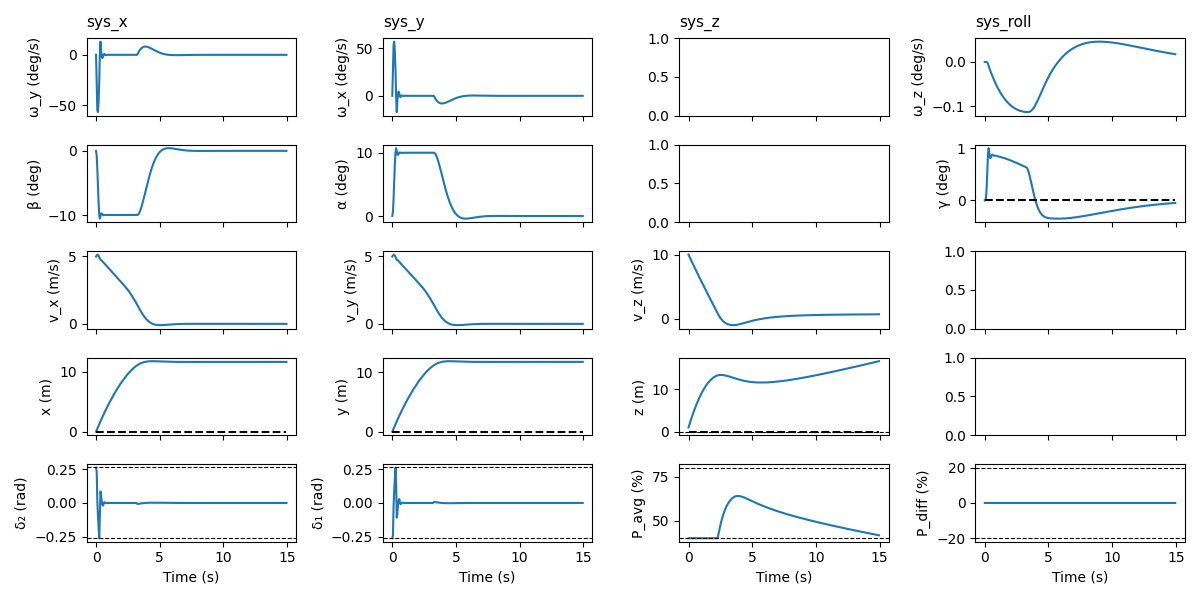

In [4]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])